In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
from matplotlib import colormaps
import seaborn as sea
import geopandas as gpd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings

In [ ]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))
df.head().T

In [20]:
import pandas as pd
import io

train = 'train.csv'
historical = 'historical_weather.csv'

train = pd.read_csv(io.StringIO(uploaded[train].decode('utf-8')))
historical_weather = pd.read_csv(io.StringIO(uploaded[historical].decode('utf-8')))


In [21]:
def get_holidays(year):
    url = f'https://www.timeanddate.com/holidays/estonia/{year}?hol=1'
    df = pd.read_html(url)[0]
    df.columns = df.columns.get_level_values(0)
    df = df[['Date', 'Name', 'Type']]
    df = df[df['Type'] == 'National holiday']
    df['Year'] = year

    try:
        df['date'] = pd.to_datetime(df['Date'] + ' ' + df['Year'].astype(str))
    except:
        df['Date'] = df['Date'].apply(replace_month_name)
        df['date'] = pd.to_datetime(df['Date'] + ' ' + df['Year'].astype(str))

    df = df[['date', 'Name', 'Type']]

    return df

def replace_month_name(date):
    month_mapping = {
        'jan': 'January',
        'feb': 'February',
        'apr': 'April',
        'mei': 'May',
        'jun': 'June',
        'aug': 'August',
        'dec': 'December'
    }
    parts = date.split()
    if len(parts) == 2:
        day, month = parts
        if month.lower() in month_mapping:
            return f"{day} {month_mapping[month.lower()]}"
    return date

df_holiday_2022 = get_holidays(2022)
df_holiday_2023 = get_holidays(2023)

df_holiday = pd.concat([df_holiday_2022, df_holiday_2023], ignore_index=True)

df_holiday

,date,Name,Type
0,2022-01-01,New Year's Day,National holiday
1,2022-02-24,Independence Day,National holiday
2,2022-04-15,Good Friday,National holiday
3,2022-04-17,Easter Sunday,National holiday
4,2022-05-01,Labor Day,National holiday
5,2022-06-05,Pentecost,National holiday
6,2022-06-23,Victory Day,National holiday
7,2022-06-24,Midsummer Day,National holiday
8,2022-08-20,Independence Restoration Day,National holiday
9,2022-12-24,Christmas Eve,National holiday


In [23]:
# Valores objetivo medios por fecha y hora y varias variables categóricas
pivot_train = train.pivot_table(index='datetime', columns=['county', 'product_type', 'is_business', 'is_consumption'], values='target', aggfunc='mean')
pivot_train.columns = ['county{}_productType{}_isBusiness{}_isConsumption{}'.format(*col) for col in pivot_train.columns.values]
pivot_train.head().T

datetime,2021-09-01 00:00:00,2021-09-01 01:00:00,2021-09-01 02:00:00,2021-09-01 03:00:00,2021-09-01 04:00:00
county0_productType0_isBusiness1_isConsumption0,0.000,0.000,0.000,0.000,0.000
county0_productType0_isBusiness1_isConsumption1,59.000,61.600,63.100,64.000,60.500
county0_productType1_isBusiness0_isConsumption0,0.713,1.132,0.490,0.496,0.149
county0_productType1_isBusiness0_isConsumption1,96.590,77.691,91.594,87.955,88.184
county0_productType1_isBusiness1_isConsumption0,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...
county15_productType1_isBusiness1_isConsumption1,17.703,20.416,27.440,19.050,21.228
county15_productType3_isBusiness0_isConsumption0,0.000,0.000,0.000,0.000,0.000
county15_productType3_isBusiness0_isConsumption1,59.366,56.357,51.038,48.482,57.115
county15_productType3_isBusiness1_isConsumption0,0.000,0.000,0.000,0.000,0.000


In [24]:
# Pivotear datos históricos del clima - temperatura media y la radiación de onda corta por datetime
pivot_historical_weather = historical_weather.pivot_table(index='datetime', values=['temperature', 'shortwave_radiation'], aggfunc='mean')
pivot_historical_weather.head().T

datetime,2021-09-01 00:00:00,2021-09-01 01:00:00,2021-09-01 02:00:00,2021-09-01 03:00:00,2021-09-01 04:00:00
shortwave_radiation,6.312500,3.892857,1.758929,0.330357,0.000000
temperature,13.308929,13.211607,13.109821,12.985714,12.863393


In [27]:
# Entrenamiento e historial
train_data = pivot_train.merge(pivot_historical_weather, left_index=True, right_index=True)

train_data.index = pd.to_datetime(train_data.index)
train_data['date'] = pd.to_datetime(train_data.index.date)
train_data = train_data.reset_index().merge(df_holiday, on='date', how='left')
train_data = train_data.set_index('datetime')
train_data = train_data.loc['2022-07':]  # De julio de 2022 en adelante (relevancia)

train_data.head().T

datetime,2022-07-01 00:00:00,2022-07-01 01:00:00,2022-07-01 02:00:00,2022-07-01 03:00:00,2022-07-01 04:00:00
county0_productType0_isBusiness1_isConsumption0,0.0,0.0,0.0,0.0,0.6
county0_productType0_isBusiness1_isConsumption1,245.06,242.2,241.46,231.54,223.08
county0_productType1_isBusiness0_isConsumption0,0.724,0.589,1.243,0.92,3.074
county0_productType1_isBusiness0_isConsumption1,304.117,256.06,234.613,209.147,186.839
county0_productType1_isBusiness1_isConsumption0,0.0,0.0,0.0,0.0,0.277
...,...,...,...,...,...
shortwave_radiation,2.125,2.196429,1.026786,0.580357,6.214286
temperature,20.963393,20.610714,20.275,19.974107,19.791071
date,2022-07-01 00:00:00,2022-07-01 00:00:00,2022-07-01 00:00:00,2022-07-01 00:00:00,2022-07-01 00:00:00
Name,NaN,NaN,NaN,NaN,NaN


In [28]:
# Correlación
corr_daily_mean = train_data.select_dtypes('float').resample('D').mean().corr()

corr_temperature = corr_daily_mean['temperature'].sort_values(ascending=False)
corr_temperature = corr_temperature.drop('temperature')
corr_temperature


county4_productType1_isBusiness1_isConsumption0     0.788320
county0_productType2_isBusiness0_isConsumption0     0.744698
county13_productType1_isBusiness0_isConsumption0    0.712250
county2_productType3_isBusiness1_isConsumption0     0.691547
shortwave_radiation                                 0.690673
                                                      ...   
county14_productType1_isBusiness0_isConsumption1   -0.940586
county15_productType1_isBusiness0_isConsumption1   -0.941578
county8_productType1_isBusiness0_isConsumption1    -0.942437
county11_productType1_isBusiness0_isConsumption1   -0.945617
county0_productType1_isBusiness0_isConsumption1    -0.951733
Name: temperature, Length: 139, dtype: float64

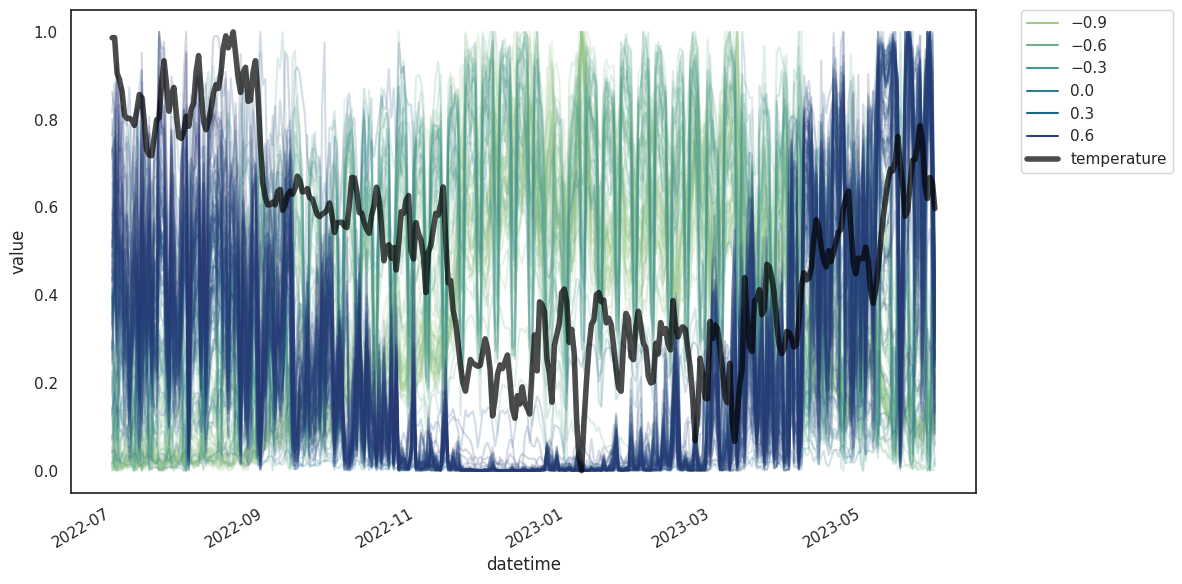

In [42]:
# Columnas según la correlación de temperatura
df_plot = train_data[corr_temperature.index]
df_plot.columns = corr_temperature.to_list()

df_plot = df_plot.resample('D').mean()

df_plot = (df_plot - df_plot.min()) / (df_plot.max() - df_plot.min())

df_plot = df_plot.dropna(axis=1)

df_plot = df_plot.reset_index()

df_plot = df_plot.melt(var_name='correlation', id_vars='datetime')

plt.figure(figsize=(12, 6))

ax = sns.lineplot(
    data=df_plot,
    x="datetime",
    y="value",
    hue="correlation",
    palette="crest",
    alpha=0.2
)

weather_plot = train_data['temperature'].resample('D').mean()
weather_plot = (weather_plot - weather_plot.min()) / (weather_plot.max() - weather_plot.min())
weather_plot.plot(ax=ax, linewidth=4, color='black', alpha=0.7)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()

plt.show()

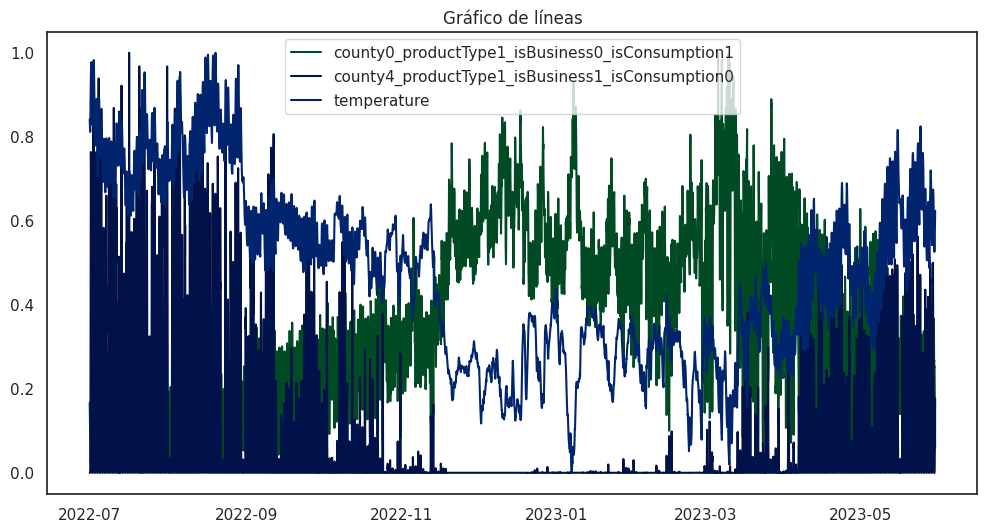

In [46]:
# Escala
import matplotlib.pyplot as plt

# Normalizando
df_plot = train_data[[corr_temperature.index[-1], corr_temperature.index[0], 'temperature']]
df_plot = (df_plot - df_plot.min()) / (df_plot.max() - df_plot.min())

plt.figure(figsize=(12, 6))
for column in df_plot.columns:
    plt.plot(df_plot.index, df_plot[column], label=column)

plt.legend()
plt.title('Gráfico de líneas')
plt.show()

<Axes: xlabel='datetime'>

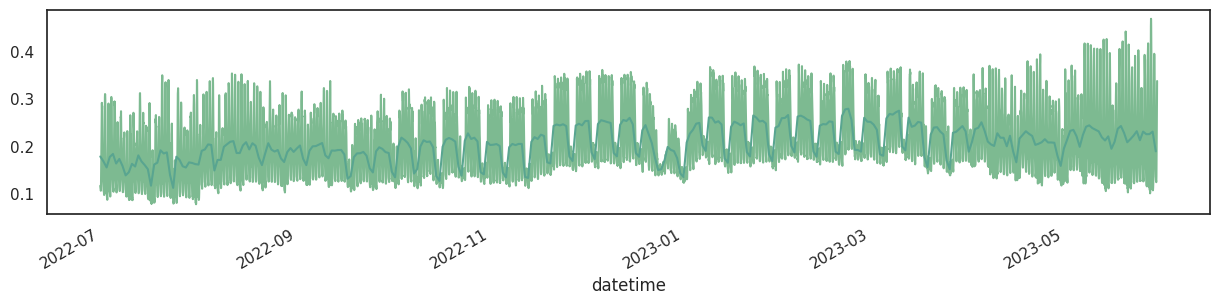

In [49]:
# Columnas 'isBusiness1';frecuencias y tiempo
import seaborn as sns

df_plot = train_data.loc[:, train_data.columns.str.contains('isBusiness1')]
df_plot = (df_plot - df_plot.min()) / (df_plot.max() - df_plot.min())
df_plot = df_plot.mean(axis=1)

sns.set_palette("crest")

df_plot.plot(figsize=(15, 3))
df_plot.resample('D').mean().plot(figsize=(15, 3))

In [50]:
# Target
df_plot = df_plot.rename('target').to_frame()

# Hora, día de la semana y momento de la semana
df_plot['hour'] = df_plot.index.hour
df_plot['weekday'] = df_plot.index.weekday
df_plot['timeofweek'] = df_plot['weekday'] * 24 + df_plot['hour']

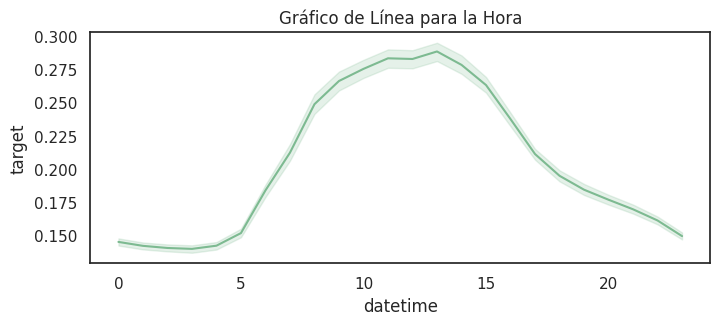

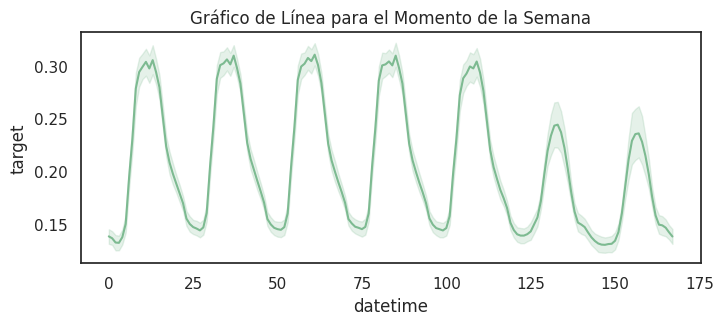

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de línea para la hora
plt.figure(figsize=(8, 3))
sns.lineplot(data=df_plot, x=df_plot.index.hour, y="target")
plt.title('Gráfico de Línea para la Hora')
plt.show()

# Gráfico de línea para el momento de la semana
plt.figure(figsize=(8, 3))
sns.lineplot(data=df_plot, x=df_plot.index.weekday * 24 + df_plot.index.hour, y="target")
plt.title('Gráfico de Línea para el Momento de la Semana')
plt.show()

In [52]:
# Días normales
df_plot['day_type'] = 'Regular days'

# Días de la semana
df_plot.loc[df_plot['weekday'] > 4, 'day_type'] = 'Weekends'

# Días festivos
df_plot.loc[train_data['Type'] == 'National holiday', 'day_type'] = 'National holiday'

df_plot['day_name'] = df_plot['day_type'].copy()
df_plot.loc[~train_data['Name'].isna(), 'day_name'] = train_data.loc[~train_data['Name'].isna(), 'Name']

In [56]:
!pip install plotly

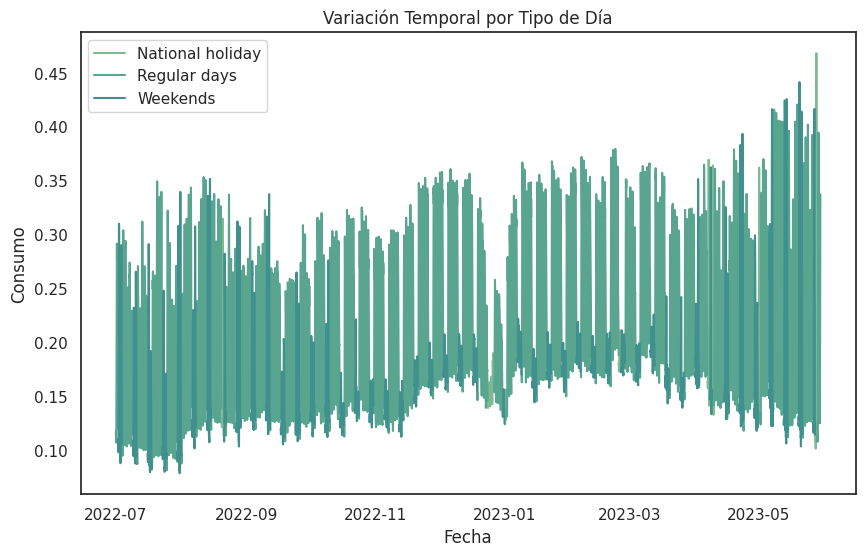

In [79]:
import matplotlib.pyplot as plt

ts_plot = df_plot.pivot_table(columns='day_type', index='datetime', values='target')

fig, ax = plt.subplots(figsize=(10, 6))

for column in ts_plot.columns:
    ax.plot(ts_plot.index, ts_plot[column], label=column)

ax.set_title('Variación Temporal por Tipo de Día')
ax.set_xlabel('Fecha')
ax.set_ylabel('Consumo')
ax.legend()
plt.show()

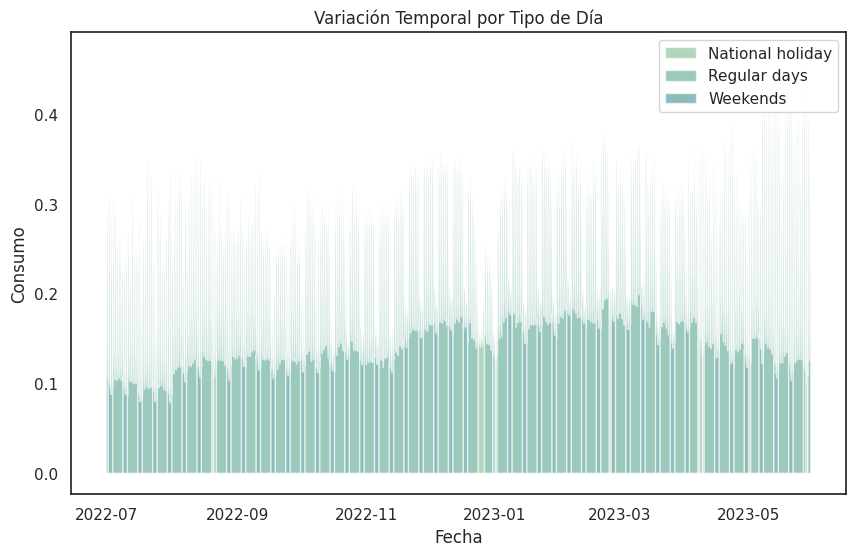

In [100]:
import matplotlib.pyplot as plt
import pandas as pd

ts_plot = df_plot.pivot_table(columns='day_type', index='datetime', values='target')

fig, ax = plt.subplots(figsize=(10, 6))

for column in ts_plot.columns:
    ax.fill_between(ts_plot.index, ts_plot[column], label=column, alpha=0.6)

ax.set_title('Variación Temporal por Tipo de Día')
ax.set_xlabel('Fecha')
ax.set_ylabel('Consumo')
ax.legend()
plt.show()

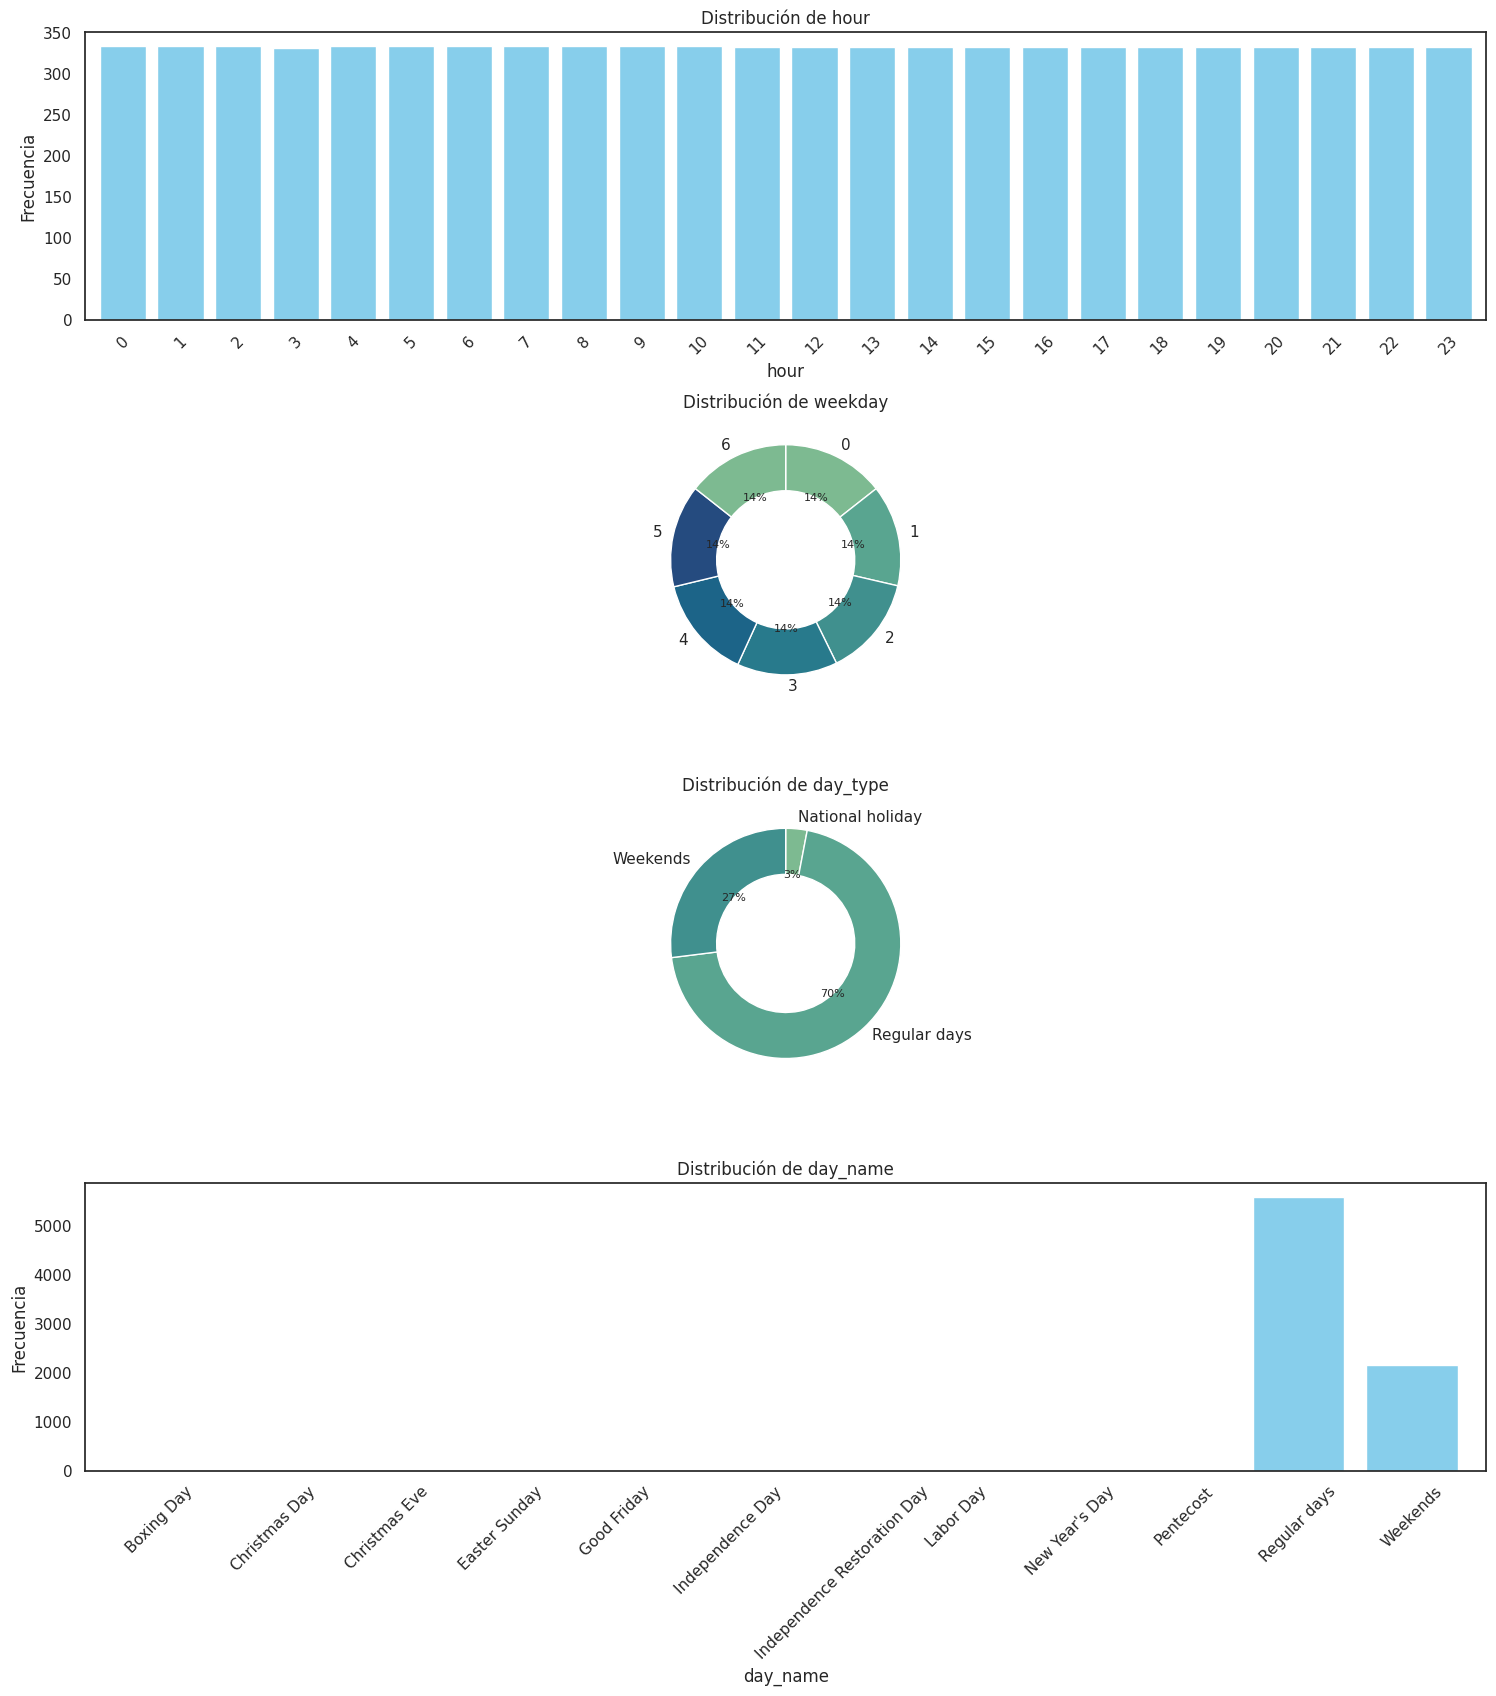

In [115]:
# Graficas
import matplotlib.pyplot as plt

# Seleccionar columnas relevantes para el gráfico de barras
columns_to_plot = ['hour', 'weekday', 'day_type', 'day_name']

# Configurar el tamaño de la figura y el estilo de las letras
fig, axes = plt.subplots(nrows=len(columns_to_plot), figsize=(15, 17))
plt.rcParams.update({'font.size': 8})

# Iterar sobre las columnas y crear gráficos de barras circulares o de barras según el caso
for i, col in enumerate(columns_to_plot):
    axes[i].set_title(f'Distribución de {col}')

    if len(df_plot[col].unique()) < 9:
        lbs, counts = np.unique(df_plot[col].values, return_counts=True)
        axes[i].pie(counts, labels=lbs, autopct='%.0f%%', startangle=90, counterclock=False, wedgeprops=dict(width=0.4))
    else:
        df_plot[col].value_counts().sort_index().plot(kind='bar', ax=axes[i], color='skyblue', width=0.8)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frecuencia')
        axes[i].tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x

# Ajustar el espaciado vertical y horizontal de la figura
plt.subplots_adjust(hspace=0.8, wspace=0.3)

# Eliminar la cuadrícula
for ax in axes:
    ax.grid(False)

# Ajustar el diseño de la figura
plt.tight_layout()

# Mostrar la figura
plt.show()